In [2]:
import hvplot.pandas
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

<AxesSubplot:title={'center':'Children infected with HIV during 1990-2020'}, xlabel='Year', ylabel='Children (ages 0-14) newly infected with HIV'>

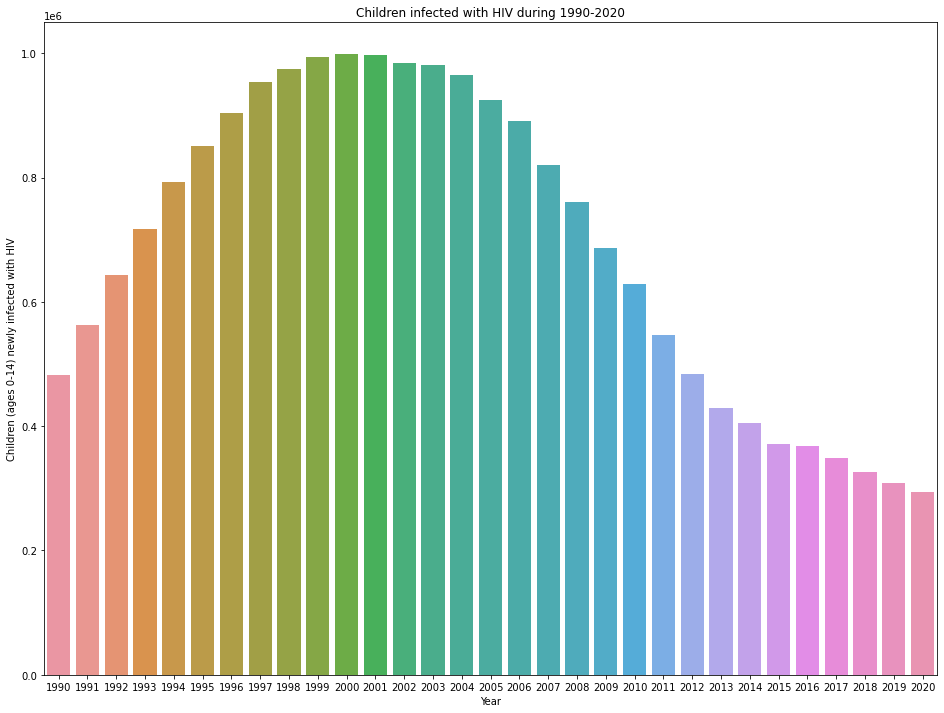

In [3]:
# read the data
df = sns.load_dataset('number-of-children-newly-infected-with-hiv')
country_year_sum = df.groupby('Year').agg({'Children (ages 0-14) newly infected with HIV':'sum'})
country_year_sum['Year'] = country_year_sum.index.tolist()
plt.figure(figsize = (16,12))
plot1 = sns.barplot(data = country_year_sum,y = 'Children (ages 0-14) newly infected with HIV',x = 'Year')
plot1.set_title('Children infected with HIV during 1990-2020')
plot1
#It shows that many of children in global countries at age of 0 to 14 newly infected with HIV during 1990-2020 and during 1990 to 2000 ,the number of Children newly infecting with HIV increased ,since 2000,newly infecting has been declined gradually.  

In [4]:
#read data about death of obesity and death of HIV
df_death_all_hiv = sns.load_dataset('deaths-and-new-cases-of-hiv')
df_obesity = sns.load_dataset('share-of-deaths-obesity')
df_obesity_hiv = pd.merge(df_death_all_hiv,df_obesity)
#To test wether obesity is related to HIV
plot2 = df_obesity_hiv.hvplot.scatter( x = 'Deaths - HIV/AIDS - Sex: Both - Age: All Ages (Number)',y = 'Deaths - Cause: All causes - Risk: High body-mass index - Sex: Both - Age: Age-standardized (Percent)',by = 'Entity',width = 1000)
plot2
#Result shows that obesity death may be not related to HIV

:NdOverlay   [Entity]
   :Scatter   [Deaths - HIV/AIDS - Sex: Both - Age: All Ages (Number)]   (Deaths - Cause: All causes - Risk: High body-mass index - Sex: Both - Age: Age-standardized (Percent))

In [5]:
# read the data
df_death_all_hiv = sns.load_dataset('deaths-and-new-cases-of-hiv')
df_infect_women = sns.load_dataset('share-of-women-among-the-population-living-with-hiv')
df_infect_of_all = pd.merge(df_death_all_hiv,df_infect_women)
#Calculate different gender of living with hiv
df_infect_of_all['share-of-men-among-the-population-living-with-hiv'] = df_infect_of_all['Incidence - HIV/AIDS - Sex: Both - Age: All Ages (Number)'] - df_infect_of_all["Women's share of population ages 15+ living with HIV (%)"]
df_women_men = df_infect_of_all[['Code','share-of-men-among-the-population-living-with-hiv',"Women's share of population ages 15+ living with HIV (%)"]]
df_women_men.set_index(['Code'],inplace = True)
df_women_men.columns = ['man','woman']
df_women_men_all = df_women_men.melt()
df_women_men_all['Code'] = df_infect_of_all['Code'].tolist()*2
df_women_men_all.columns = ['sex','population-living-with-hiv','Code']
# Test whether living with hiv is different between male and female
plot3 = df_women_men_all.hvplot.violin(y = "population-living-with-hiv",by = ['Code','sex'],width = 15000)
plot3
#The result shows that most of countries are not difference between male female  but a few show that males more easily infects HIV than female.

:Violin   [Code,sex]   (population-living-with-hiv)

<Figure size 1152x864 with 0 Axes>

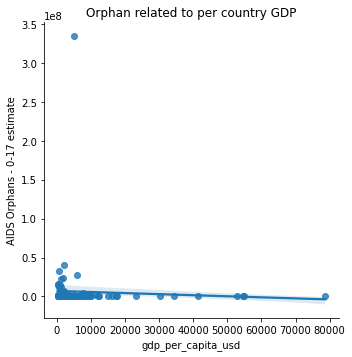

In [6]:
#Read the data
df_economy = sns.load_dataset('economy')
df_country_list = sns.load_dataset('country-and-continent-codes-list-csv')
df_orphaned = sns.load_dataset('number-of-children-orphaned-from-aids')
df_country_list.columns = ['Continent_Name','Continent_Code','Country_Name','Two_Letter_Country_Code','Code','Country_Number']
df_economy.columns = ['Two_Letter_Country_Code','gdp_usd','gdp_per_capita_usd','human_capital_index']
#Calculate each country orphans from 1990 to 2020
df_orphaned_year = df_orphaned.groupby('Code').agg({'AIDS Orphans - 0-17 estimate':'sum'})
df_orphaned_country = df_orphaned_year.merge(df_country_list,how='left', on='Code')
df_orphaned_country_economy = df_orphaned_country.merge(df_economy,how='left', on='Two_Letter_Country_Code')
#Test wether country orpans are related to GDP
plt.figure(figsize = (16,12))
plot4 = sns.lmplot(data = df_orphaned_country_economy,y = 'AIDS Orphans - 0-17 estimate',x = 'gdp_per_capita_usd')
ax = plt.gca()
ax.set_title('Orphan related to per country GDP')
plot4
#It seems that there are no connection between orphan and GDP

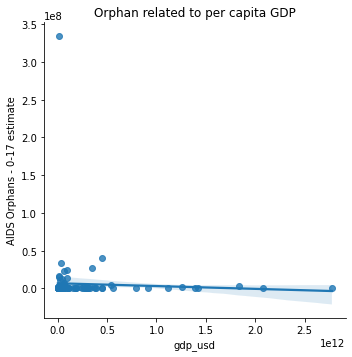

In [7]:
#Test wether country orpans are related to capita GDP
plot5 = sns.lmplot(data = df_orphaned_country_economy,y = 'AIDS Orphans - 0-17 estimate',x = 'gdp_usd')
ax = plt.gca()
ax.set_title('Orphan related to per capita GDP')
plot5
#It seems that there are no connection between orphans and capita GDP

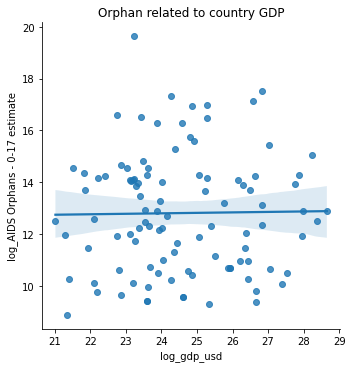

In [8]:
#However the inconspicuous correlation may be due to the large values of X and Y axes, so log10 is taken for both before plotting
df_orphaned_country_economy['log_gdp_usd']=np.log(df_orphaned_country_economy['gdp_usd'])
df_orphaned_country_economy['log_gdp_per_capita_usd']=np.log(df_orphaned_country_economy['gdp_per_capita_usd'])
df_orphaned_country_economy['log_AIDS Orphans - 0-17 estimate']=np.log(df_orphaned_country_economy['AIDS Orphans - 0-17 estimate'])
plot6 = sns.lmplot(data = df_orphaned_country_economy,y = 'log_AIDS Orphans - 0-17 estimate',x = 'log_gdp_usd')
ax = plt.gca()
ax.set_title('Orphan related to country GDP')
plot6
#It seems that there are no connection between log10 orphan and log10 GDP

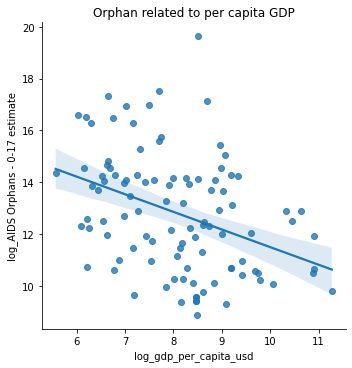

In [9]:
#Same as before
plot7 = sns.lmplot(data = df_orphaned_country_economy,y = 'log_AIDS Orphans - 0-17 estimate',x = 'log_gdp_per_capita_usd')
ax = plt.gca()
ax.set_title('Orphan related to per capita GDP')
plot7
#The result shows that log10 orphans is negative correlation with log10 GDP